In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Student_ID': range(1, 11),
    'Math_Score': [78, 85, 92, np.nan, 88, 76, 95, 89, 101, 45], 
    'Science_Score': [80, 89, 94, 85, 78, np.nan, 88, 92, 99, 50],  
    'Attendance (%)': [95, 88, 92, 85, 90, 100, 75, np.nan, 98, 60],  
    'Study_Hours': [2, 3, 4, 1, 2.5, 3.5, 4.5, 5, 10, 0],  
    'Participation': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)

In [3]:
df

,Student_ID,Math_Score,Science_Score,Attendance (%),Study_Hours,Participation
0,1,78.0,80.0,95.0,2.0,Yes
1,2,85.0,89.0,88.0,3.0,No
2,3,92.0,94.0,92.0,4.0,Yes
3,4,NaN,85.0,85.0,1.0,No
4,5,88.0,78.0,90.0,2.5,Yes
5,6,76.0,NaN,100.0,3.5,Yes
6,7,95.0,88.0,75.0,4.5,No
7,8,89.0,92.0,NaN,5.0,Yes
8,9,101.0,99.0,98.0,10.0,No
9,10,45.0,50.0,60.0,0.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student_ID      10 non-null     int64  
 1   Math_Score      9 non-null      float64
 2   Science_Score   9 non-null      float64
 3   Attendance (%)  9 non-null      float64
 4   Study_Hours     10 non-null     float64
 5   Participation   10 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 612.0+ bytes


In [5]:
df.describe()

,Student_ID,Math_Score,Science_Score,Attendance (%),Study_Hours
count,10.00000,9.000000,9.000000,9.000000,10.000000
mean,5.50000,83.222222,83.888889,87.000000,3.550000
std,3.02765,16.323126,14.312970,12.579746,2.743173
min,1.00000,45.000000,50.000000,60.000000,0.000000
25%,3.25000,78.000000,80.000000,85.000000,2.125000
50%,5.50000,88.000000,88.000000,90.000000,3.250000
75%,7.75000,92.000000,92.000000,95.000000,4.375000
max,10.00000,101.000000,99.000000,100.000000,10.000000


In [6]:
df.isnull().sum()

Student_ID        0
Math_Score        1
Science_Score     1
Attendance (%)    1
Study_Hours       0
Participation     0
dtype: int64

In [7]:
features = ['Math_Score','Science_Score','Attendance (%)']

for feature in features:
    df[feature].fillna(df[feature].mean(), inplace = True)

C:\Users\Shruti\AppData\Local\Temp\ipykernel_31828\160250859.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mean(), inplace = True)


In [8]:
df.isnull().sum()

Student_ID        0
Math_Score        0
Science_Score     0
Attendance (%)    0
Study_Hours       0
Participation     0
dtype: int64

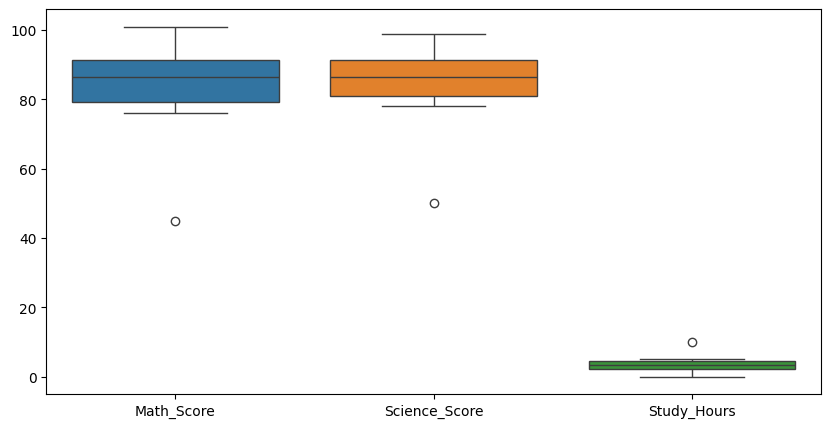

In [9]:
# Detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Math_Score', 'Science_Score', 'Study_Hours']])
plt.show()


In [10]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df[col] = np.where(df[col] > upper_bound, upper_bound, 
                          np.where(df[col] < lower_bound, lower_bound, df[col]))

In [11]:
columns = ['Math_Score', 'Science_Score', 'Study_Hours']
for col in columns:
    remove_outliers(df,col)

In [12]:
# Remove outliers using Z-score method
df['zscore'] = (df['Math_Score'] - df['Math_Score'].mean()) / df['Math_Score'].std()
df_cleaned = df[abs(df['zscore']) < 3].drop('zscore', axis=1)


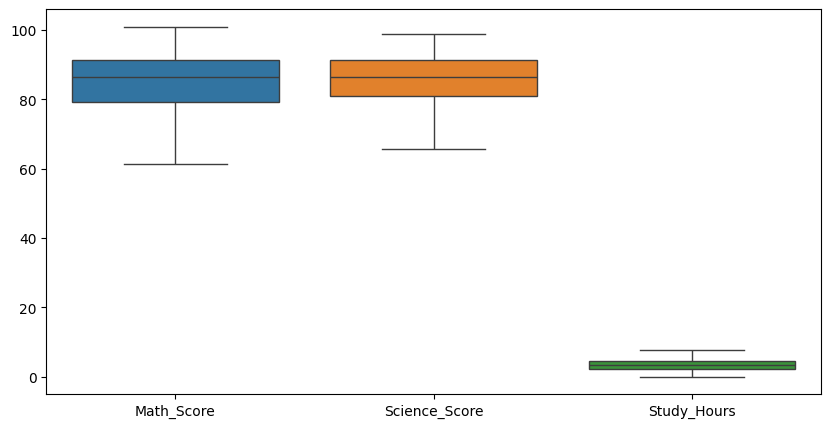

In [13]:
# Detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Math_Score', 'Science_Score', 'Study_Hours']])
plt.show()


In [14]:
df['Participation'] = df['Participation'].replace({'Yes': 1, 'No': 0})
df.head()


C:\Users\Shruti\AppData\Local\Temp\ipykernel_31828\1842139807.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Participation'] = df['Participation'].replace({'Yes': 1, 'No': 0})


,Student_ID,Math_Score,Science_Score,Attendance (%),Study_Hours,Participation,zscore
0,1,78.000000,80.0,95.0,2.0,1,-0.614921
1,2,85.000000,89.0,88.0,3.0,0,0.012448
2,3,92.000000,94.0,92.0,4.0,1,0.639816
3,4,83.222222,85.0,85.0,1.0,0,-0.146884
4,5,88.000000,78.0,90.0,2.5,1,0.281320


In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
#'Math_Score', 'Science_Score', 'Study_Hours'

# Min-max scaling
df["math_scaled"] = minmax_scaler.fit_transform(df[["Math_Score"]])
df["reading_scaled"] = minmax_scaler.fit_transform(df[["Science_Score"]])
df["writing_scaled"] = minmax_scaler.fit_transform(df[["Study_Hours"]])

# Z-score Standardization (mean = 0, std = 1)
df["math_standardized"] = standard_scaler.fit_transform(df[["Math_Score"]])
df["reading_standardized"] = standard_scaler.fit_transform(df[["Science_Score"]])
df["writing_standardized"] = standard_scaler.fit_transform(df[["Study_Hours"]])

df[['math_standardized', 'reading_standardized', 'writing_standardized']].corr()

,math_standardized,reading_standardized,writing_standardized
math_standardized,1.000000,0.874041,0.825979
reading_standardized,0.874041,1.000000,0.852583
writing_standardized,0.825979,0.852583,1.000000


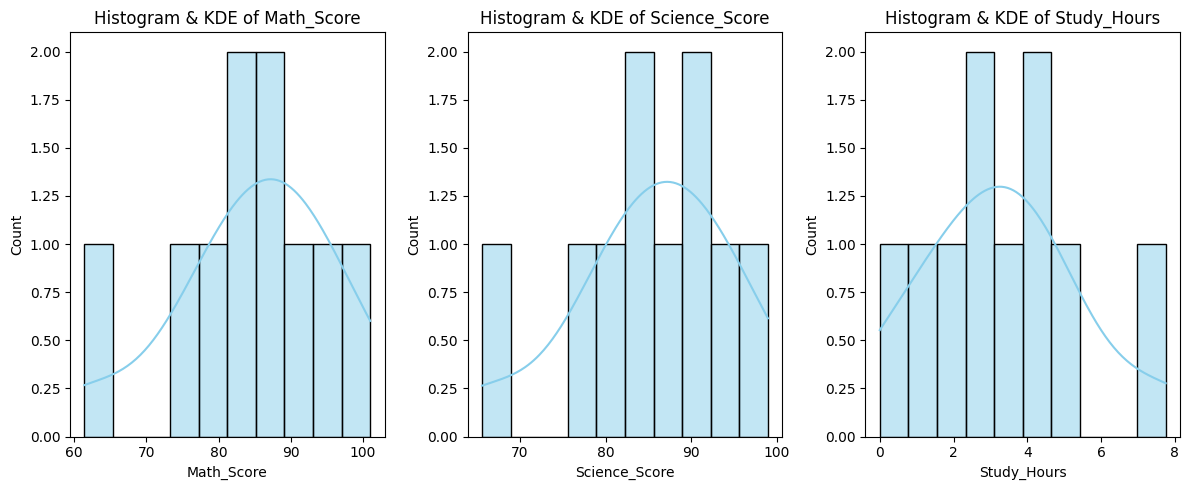

In [21]:
# Plot histogram and KDE
plt.figure(figsize=(12, 5))
for i, col in enumerate(["Math_Score", "Science_Score", "Study_Hours"], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=10, kde=True, color="skyblue")
    plt.title(f"Histogram & KDE of {col}")
plt.tight_layout()
plt.show()


In [17]:
df["Math_Score_log"] = np.log1p(df["Math_Score"])  


In [18]:
df["Math_Score_sqrt"] = np.sqrt(df["Science_Score"])


In [19]:

df["Study_log"] = np.log1p(df["Study_Hours"])
df["Study_sqrt"] = np.sqrt(df["Study_Hours"])
df["Study_cbrt"] = np.cbrt(df["Study_Hours"])